In [1]:
import ROOT
import uproot
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

Welcome to JupyROOT 6.24/00


In [2]:
%config InlineBackend.figure_format = 'svg'

In [3]:
def plot(listA, listB, xlabel='', ylabel='', EvsE = True):
    fig = plt.figure(figsize=(7,7))
    plt.scatter(listA, listB, s=2)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    if(EvsE):
        axes = plt.gca()    
        axes.set_xlim([0,350])
        axes.set_ylim([0,350])
        plt.axline((150,150), (400,400))

def color2Dplot(x, y, z, xlabel='', ylabel='', zlabel='', title=''):
    plt.figure(figsize=(10,6))
    points = plt.scatter(x, y, c=z, cmap='jet',lw=0, s=10)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    cbar = plt.colorbar(points)
    cbar.set_label(zlabel)
    
def MakeDataFrame(inputFile):
    f = uproot.open(inputFile)
    tree = f[inputFile.split('/')[-1].replace('.root','')]
    df = tree.arrays(library="pd")
    df['Tot1x1_1'] = df['EM1x1_1'] + df['Had1x1_1']
    df['Tot3x3_1'] = df['EM3x3_1'] + df['Had3x3_1']
    df['Tot5x5_1'] = df['EM5x5_1'] + df['Had5x5_1']
    df['Tot7x7_1'] = df['EM7x7_1'] + df['Had7x7_1']
    df['Tot9x9_1'] = df['EM9x9_1'] + df['Had9x9_1']
    df['Tot11x11_1'] = df['EM11x11_1'] + df['Had11x11_1']

    df['Tot1x1_2'] = df['EM1x1_2'] + df['Had1x1_2']
    df['Tot3x3_2'] = df['EM3x3_2'] + df['Had3x3_2']
    df['Tot5x5_2'] = df['EM5x5_2'] + df['Had5x5_2']
    df['Tot7x7_2'] = df['EM7x7_2'] + df['Had7x7_2']
    df['Tot9x9_2'] = df['EM9x9_2'] + df['Had9x9_2']
    df['Tot11x11_2'] = df['EM11x11_2'] + df['Had11x11_2']    

    df['GenFullEnergy_1'] = df['GenEnergy_1']*np.cosh(df['GenEta_1'])
    df['GenFullEnergy_2'] = df['GenEnergy_2']*np.cosh(df['GenEta_2'])
    
    return df

def getEdges(distFromEdge):
    """
    distFromEdge is the number of eta bins to discard from high and low eta edge of the HGC
    """
    EtaCutHigh = (35 - distFromEdge) * 0.087
    EtaCutLow = (15 + distFromEdge) * 0.087
    return(EtaCutLow, EtaCutHigh)

In [4]:
#df = MakeDataFrame('varsDir/vars_VBFHToInv_NoPU_WithEnergySplit.root')
df = MakeDataFrame('varsDir/vars_VBFHToInv_NoPU_NoEnergySplit.root')

/vols/cms/mhh18/volsb/miniconda/miniconda3/envs/myenv/lib/python3.7/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: overflow encountered in cosh
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [5]:
for j in range(1,3):
    for i in range(6):
        command = "df_{0}binsfromEdge_{1} = df[(abs(df['GenEta_{1}'])>getEdges({0})[0]) & (abs(df['GenEta_{1}'])<getEdges({0})[1])]".format(i, j)
        print(command)
        exec(command)

df_0binsfromEdge_1 = df[(abs(df['GenEta_1'])>getEdges(0)[0]) & (abs(df['GenEta_1'])<getEdges(0)[1])]
df_1binsfromEdge_1 = df[(abs(df['GenEta_1'])>getEdges(1)[0]) & (abs(df['GenEta_1'])<getEdges(1)[1])]
df_2binsfromEdge_1 = df[(abs(df['GenEta_1'])>getEdges(2)[0]) & (abs(df['GenEta_1'])<getEdges(2)[1])]
df_3binsfromEdge_1 = df[(abs(df['GenEta_1'])>getEdges(3)[0]) & (abs(df['GenEta_1'])<getEdges(3)[1])]
df_4binsfromEdge_1 = df[(abs(df['GenEta_1'])>getEdges(4)[0]) & (abs(df['GenEta_1'])<getEdges(4)[1])]
df_5binsfromEdge_1 = df[(abs(df['GenEta_1'])>getEdges(5)[0]) & (abs(df['GenEta_1'])<getEdges(5)[1])]
df_0binsfromEdge_2 = df[(abs(df['GenEta_2'])>getEdges(0)[0]) & (abs(df['GenEta_2'])<getEdges(0)[1])]
df_1binsfromEdge_2 = df[(abs(df['GenEta_2'])>getEdges(1)[0]) & (abs(df['GenEta_2'])<getEdges(1)[1])]
df_2binsfromEdge_2 = df[(abs(df['GenEta_2'])>getEdges(2)[0]) & (abs(df['GenEta_2'])<getEdges(2)[1])]
df_3binsfromEdge_2 = df[(abs(df['GenEta_2'])>getEdges(3)[0]) & (abs(df['GenEta_2'])<getEdge

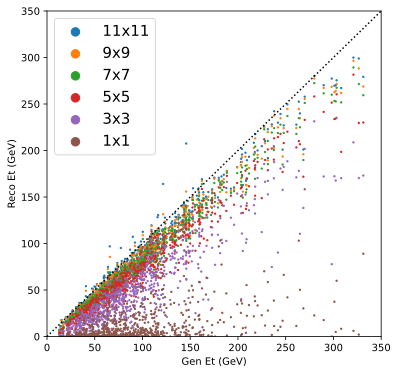

In [6]:
x = df_5binsfromEdge_1['GenEnergy_1']
y1 = df_5binsfromEdge_1['Tot1x1_1']
y3 = df_5binsfromEdge_1['Tot3x3_1']
y5 = df_5binsfromEdge_1['Tot5x5_1']
y7 = df_5binsfromEdge_1['Tot7x7_1']
y9 = df_5binsfromEdge_1['Tot9x9_1']
y11 = df_5binsfromEdge_1['Tot11x11_1']
markersize = 2
alpha=1
fig = plt.figure(figsize=(6,6))
plt.scatter(x, y11, s=markersize, label='11x11', alpha=alpha)
plt.scatter(x, y9, s=markersize, label='9x9', alpha=alpha)
plt.scatter(x, y7, s=markersize, label='7x7', alpha=alpha)
plt.scatter(x, y5, s=markersize, label='5x5', alpha=alpha)
plt.scatter(x, y3, s=markersize, label='3x3', alpha=alpha)
plt.scatter(x, y1, s=markersize, label='1x1', alpha=alpha)
axes = plt.gca() 
axes.set_xlim([0,350])
axes.set_ylim([0,350])
plt.axline((150,150), (550,550), linestyle=":", color='black')
plt.xlabel('Gen Et (GeV)')
plt.ylabel('Reco Et (GeV)')
plt.legend(loc='upper left', fontsize=15, markerscale=6)
#axes.set_title('Leading Jet, excluding 5 closest eta bins on the two edges')

Text(0.5, 0, '(Gen Et - Reco Et)/(Gen Et)')

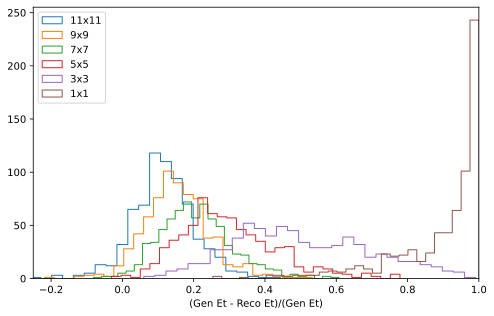

In [7]:
fig = plt.figure(figsize=(8,5))
alphaB= 1
binsB = 30
m11, bins11, patches11 = plt.hist((x-y11)/x, bins=binsB, alpha=alphaB, label='11x11', histtype=u'step')
m9, bins9, patches9 = plt.hist((x-y9)/x, bins=binsB, alpha=alphaB, label='9x9', histtype=u'step')
m7, bins7, patches7 = plt.hist((x-y7)/x, bins=binsB, alpha=alphaB, label='7x7', histtype=u'step')
m5, bins5, patches5 = plt.hist((x-y5)/x, bins=binsB, alpha=alphaB, label='5x5', histtype=u'step')
m3, bins3, patches3 = plt.hist((x-y3)/x, bins=binsB, alpha=alphaB, label='3x3', histtype=u'step')
m1, bins1, patches1 = plt.hist((x-y1)/x, bins=binsB, alpha=alphaB, label='1x1', histtype=u'step')
plt.legend(loc='upper left', fontsize=10, markerscale=6)
axes = plt.gca() 
axes.set_xlim([-0.25,1])
plt.xlabel('(Gen Et - Reco Et)/(Gen Et)')

Text(0.5, 0, 'Gen Et - Reco Et (GeV)')

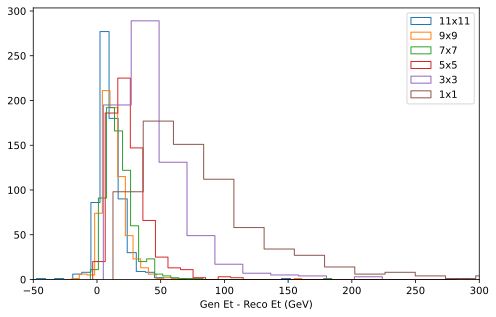

In [8]:
fig = plt.figure(figsize=(8,5))
alphaB= 1
binsB = 30
m11, bins11, patches11 = plt.hist((x-y11), bins=binsB, alpha=alphaB, label='11x11', histtype=u'step')
m9, bins9, patches9 = plt.hist((x-y9), bins=binsB, alpha=alphaB, label='9x9', histtype=u'step')
m7, bins7, patches7 = plt.hist((x-y7), bins=binsB, alpha=alphaB, label='7x7', histtype=u'step')
m5, bins5, patches5 = plt.hist((x-y5), bins=binsB, alpha=alphaB, label='5x5', histtype=u'step')
m3, bins3, patches3 = plt.hist((x-y3), bins=binsB, alpha=alphaB, label='3x3', histtype=u'step')
m1, bins1, patches1 = plt.hist((x-y1), bins=binsB, alpha=alphaB, label='1x1', histtype=u'step')
plt.legend(loc='upper right', fontsize=10, markerscale=6)
axes = plt.gca() 
axes.set_xlim([-50,300])
plt.xlabel('Gen Et - Reco Et (GeV)')

Text(0.5, 0, '(Gen Et - Reco Et)/(Gen Et)')

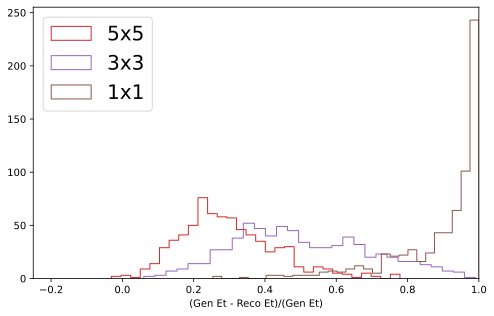

In [9]:
fig = plt.figure(figsize=(8,5))
alphaE= 1
plt.hist((x-y5)/x, bins=30, alpha=alphaE, label='5x5', histtype=u'step', color=patches5[0].get_facecolor())
plt.hist((x-y3)/x, bins=30, alpha=alphaE, label='3x3', histtype=u'step', color=patches3[0].get_facecolor())
plt.hist((x-y1)/x, bins=30, alpha=alphaE, label='1x1', histtype=u'step', color=patches1[0].get_facecolor())
plt.legend(loc='upper left', fontsize=20)
#plt.xlabel('Gen Et - Reco Et (GeV)')
axes = plt.gca() 
#axes.set_xlim([-50,300])
axes.set_xlim([-0.25,1])
plt.xlabel('(Gen Et - Reco Et)/(Gen Et)')

(-50.0, 300.0)

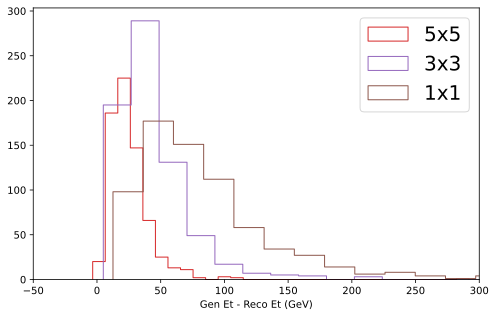

In [10]:
fig = plt.figure(figsize=(8,5))
alphaE= 1
plt.hist((x-y5), bins=30, alpha=alphaE, label='5x5', histtype=u'step', color=patches5[0].get_facecolor())
plt.hist((x-y3), bins=30, alpha=alphaE, label='3x3', histtype=u'step', color=patches3[0].get_facecolor())
plt.hist((x-y1), bins=30, alpha=alphaE, label='1x1', histtype=u'step', color=patches1[0].get_facecolor())
plt.legend(loc='upper right', fontsize=20)
plt.xlabel('Gen Et - Reco Et (GeV)')
axes = plt.gca() 
axes.set_xlim([-50,300])


Text(0.5, 0, '(Gen Et - Reco Et)/(Gen Et)')

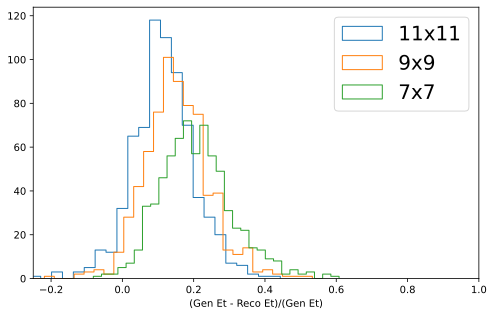

In [11]:
fig = plt.figure(figsize=(8,5))
alphaE= 1
plt.hist((x-y11)/x, bins=30, alpha=alphaE, label='11x11', histtype=u'step', color=patches11[0].get_facecolor())
plt.hist((x-y9)/x, bins=30, alpha=alphaE, label='9x9', histtype=u'step', color=patches9[0].get_facecolor())
plt.hist((x-y7)/x, bins=30, alpha=alphaE, label='7x7', histtype=u'step', color=patches7[0].get_facecolor())
plt.legend(loc='upper right', fontsize=20)
#plt.xlabel('Gen Et - Reco Et (GeV)')
axes = plt.gca() 
#axes.set_xlim([-50,100])
axes.set_xlim([-0.25,1])
plt.xlabel('(Gen Et - Reco Et)/(Gen Et)')

(-50.0, 100.0)

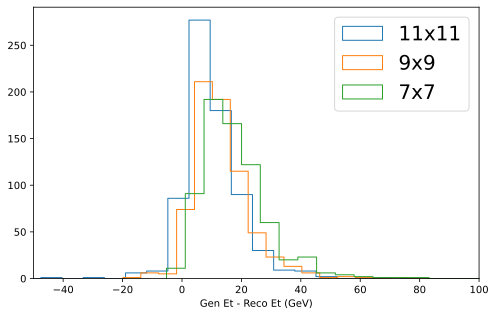

In [12]:
fig = plt.figure(figsize=(8,5))
alphaE= 1
plt.hist((x-y11), bins=30, alpha=alphaE, label='11x11', histtype=u'step', color=patches11[0].get_facecolor())
plt.hist((x-y9), bins=30, alpha=alphaE, label='9x9', histtype=u'step', color=patches9[0].get_facecolor())
plt.hist((x-y7), bins=30, alpha=alphaE, label='7x7', histtype=u'step', color=patches7[0].get_facecolor())
plt.legend(loc='upper right', fontsize=20)
plt.xlabel('Gen Et - Reco Et (GeV)')
axes = plt.gca() 
axes.set_xlim([-50,100])


In [13]:
mydf = df_5binsfromEdge_1
thresholds = np.array([20, 40, 60, 80, 100, 120, 150, 350])
variables = ['Tot1x1_1', 'Tot3x3_1', 'Tot5x5_1', 'Tot7x7_1', 'Tot9x9_1', 'Tot11x11_1']
for var in variables:
    exec("dic" + var + " = {'mean':[], 'std':[]}")
    exec("dicRatio" + var + " = {'mean':[], 'std':[]}")
    for i in range(len(thresholds)-1):
        data = mydf[(mydf['GenEnergy_1']>thresholds[i]) & (mydf['GenEnergy_1']<thresholds[i+1])]
        exec("dic" + var + "['mean'].append(data[var].mean())")
        exec("dic" + var + "['std'].append(data[var].std())")
        exec("dicRatio" + var + "['mean'].append((data[var]/data['GenEnergy_1']).mean())")
        exec("dicRatio" + var + "['std'].append((data[var]/data['GenEnergy_1']).std())")
        

In [14]:
midEnergies = np.array([ 0.5*(thresholds[i]+thresholds[i+1]) for i in range(len(thresholds)-1)])
errEnergies = np.array([ midEnergies[i]-thresholds[i] for i in range(len(midEnergies))])

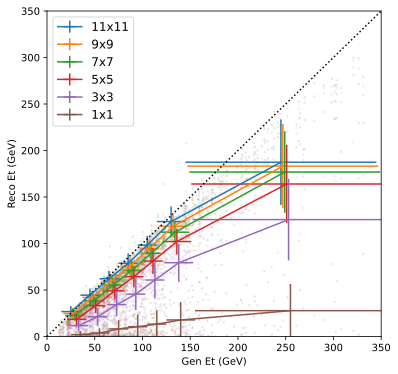

In [15]:
fig = plt.figure(figsize=(6,6))
alphaC=1
offSet=-5
for var in reversed(variables):
    exec("plt.errorbar(midEnergies+offSet, dic"+var+"['mean'], xerr=errEnergies, yerr=dic"+var+"['std'], label='"+ var.replace('Tot','').replace('_1','')+ "', alpha=alphaC)")
    offSet += 2
    
markersize = 3
alphaD=0.1
for var in reversed(variables):
    exec("plt.scatter(mydf['GenEnergy_1'], mydf['"+var+"'],s=markersize, alpha=alphaD)")

plt.xlabel('Gen Et (GeV)')
plt.ylabel('Reco Et (GeV)')
axes = plt.gca()    
axes.set_xlim([0,350])
axes.set_ylim([0,350])
plt.axline((150,150), (550,550), linestyle=":", color='black')
plt.legend(loc='upper left', fontsize=12)
#axes.set_title('Leading Jet, excluding 5 closest eta bins on the two edges')

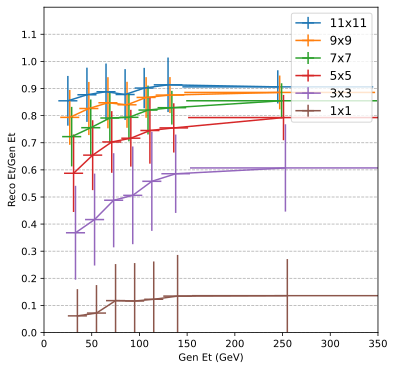

In [29]:
fig = plt.figure(figsize=(6,6))
alphaC=1
offSet=-5
for var in reversed(variables):
    exec("plt.errorbar(midEnergies+offSet, dicRatio"+var+"['mean'], xerr=errEnergies, yerr=dicRatio"+var+"['std'], label='"+ var.replace('Tot','').replace('_1','')+ "', alpha=alphaC)")
    offSet += 2

plt.xlabel('Gen Et (GeV)')
plt.ylabel('Reco Et/Gen Et')
axes = plt.gca()    
axes.set_xlim([0,350])
axes.set_ylim([0,1.2])
plt.legend(loc='upper right', fontsize=12)
plt.yticks(np.arange(0, 1.2, 0.1))
plt.grid(axis='y', linestyle='--')
#axes.set_title('Leading Jet, excluding 5 closest eta bins on the two edges')

([<matplotlib.axis.YTick at 0x7eff31711710>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

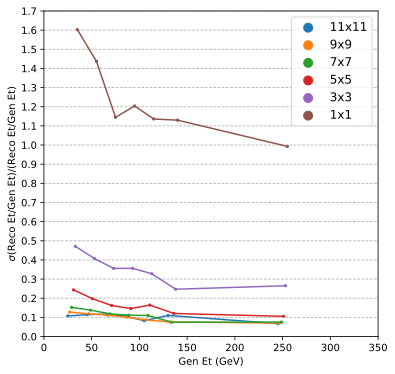

In [27]:
fig = plt.figure(figsize=(6,6))
alphaC=1
offSet=-5
markersizeB=5
for var in reversed(variables):
    exec("plt.scatter(midEnergies+offSet, \
          np.array(dicRatio"+var+"['std'])/np.array(dicRatio"+var+"['mean']),\
          label='"+ var.replace('Tot','').replace('_1','')+ "', alpha=alphaC,\
          s=markersizeB)")
    exec("plt.plot(midEnergies+offSet, np.array(dicRatio"+var+"['std'])/np.array(dicRatio"+var+"['mean']))")
    
    offSet += 2

plt.xlabel('Gen Et (GeV)')
plt.ylabel('$\sigma$(Reco Et/Gen Et)/(Reco Et/Gen Et)')
axes = plt.gca()    
axes.set_xlim([0,350])
axes.set_ylim([0,1.7])
plt.legend(loc='upper right', fontsize=12, markerscale=4)
plt.grid(axis='y', linestyle='--')
plt.yticks(np.arange(0, 1.8, 0.1))
#axes.set_title('Leading Jet, excluding 5 closest eta bins on the two edges')

## Photons

In [18]:
df_photon200 = MakeDataFrame('varsDir/vars_photonsPtLt200GeV_NoPU_WithEnergySplit.root')

In [19]:
df_photon200

,GenEnergy_1,GenEta_1,GenPhi_1,EM1x1_1,EM3x3_1,EM5x5_1,EM7x7_1,EM9x9_1,EM11x11_1,Had1x1_1,...,Tot9x9_1,Tot11x11_1,Tot1x1_2,Tot3x3_2,Tot5x5_2,Tot7x7_2,Tot9x9_2,Tot11x11_2,GenFullEnergy_1,GenFullEnergy_2
0,119.814072,-1.814897,0.027529,45.124660,125.312569,126.658508,126.810593,126.819786,126.852669,0.010144,...,126.907524,126.940407,26.276726,96.456230,115.265335,116.766327,116.858856,116.948860,377.612061,377.612061
1,43.373920,-2.260681,0.788290,4.298648,30.845423,37.279850,42.167938,42.491863,42.625957,0.029488,...,42.760540,42.916470,5.635099,36.006672,39.237183,41.384903,41.708603,41.870335,210.231186,210.231186
2,5.624879,3.084072,0.043320,0.000000,0.554406,3.381006,5.529695,5.565462,5.626059,0.000000,...,5.600515,5.684067,0.000000,0.674297,3.521210,5.831593,5.877012,5.959646,61.572636,61.572636
3,175.705948,-1.910558,-2.216887,26.323671,131.639069,180.850876,181.345444,181.411377,181.459839,0.113222,...,182.244370,182.304779,62.640923,180.101685,187.272568,187.481445,187.560135,187.617783,606.612305,606.612305
4,14.966216,2.829508,2.307833,0.008151,3.127946,9.426376,14.764585,15.044637,15.110135,0.001010,...,15.089230,15.171541,0.072559,3.557566,10.261432,14.346981,14.610678,14.703991,127.184189,127.184189
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,11.927010,1.611728,2.467876,3.201566,11.333819,11.373537,11.386402,11.390940,11.394780,0.000000,...,11.390940,11.395643,1.225544,8.623737,12.053122,12.886158,13.034050,13.060671,31.075867,31.075867
2996,86.986771,2.870817,-0.532677,0.000000,17.347843,61.392693,76.709221,80.577446,80.882950,0.009899,...,80.802094,81.173431,0.013472,15.945164,59.590076,69.240196,72.258904,72.524010,770.184509,770.184509
2997,152.396149,-1.987038,-2.504401,24.321375,129.405579,153.881241,154.092575,154.164352,154.199905,0.029023,...,154.530457,154.587326,25.781038,132.106781,149.590393,149.849747,149.989868,150.051712,566.227783,566.227783
2998,42.453152,2.911634,-0.915786,4.856494,18.346886,31.334078,40.949341,43.317612,43.475052,0.013740,...,43.461800,43.636013,4.592549,22.760714,31.924648,41.708000,43.197247,43.428841,391.443604,391.443604


In [20]:
for j in range(1,3):
    for i in range(6):
        command = "df_photon200_{0}binsfromEdge_{1} = df_photon200[(abs(df_photon200['GenEta_{1}'])>getEdges({0})[0]) & (abs(df_photon200['GenEta_{1}'])<getEdges({0})[1])]".format(i, j)
        print(command)
        exec(command)

df_photon200_0binsfromEdge_1 = df_photon200[(abs(df_photon200['GenEta_1'])>getEdges(0)[0]) & (abs(df_photon200['GenEta_1'])<getEdges(0)[1])]
df_photon200_1binsfromEdge_1 = df_photon200[(abs(df_photon200['GenEta_1'])>getEdges(1)[0]) & (abs(df_photon200['GenEta_1'])<getEdges(1)[1])]
df_photon200_2binsfromEdge_1 = df_photon200[(abs(df_photon200['GenEta_1'])>getEdges(2)[0]) & (abs(df_photon200['GenEta_1'])<getEdges(2)[1])]
df_photon200_3binsfromEdge_1 = df_photon200[(abs(df_photon200['GenEta_1'])>getEdges(3)[0]) & (abs(df_photon200['GenEta_1'])<getEdges(3)[1])]
df_photon200_4binsfromEdge_1 = df_photon200[(abs(df_photon200['GenEta_1'])>getEdges(4)[0]) & (abs(df_photon200['GenEta_1'])<getEdges(4)[1])]
df_photon200_5binsfromEdge_1 = df_photon200[(abs(df_photon200['GenEta_1'])>getEdges(5)[0]) & (abs(df_photon200['GenEta_1'])<getEdges(5)[1])]
df_photon200_0binsfromEdge_2 = df_photon200[(abs(df_photon200['GenEta_2'])>getEdges(0)[0]) & (abs(df_photon200['GenEta_2'])<getEdges(0)[1])]
df_photon200_

Text(0.5, 1.0, '')

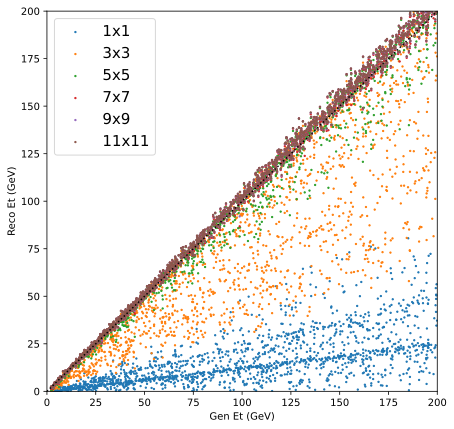

In [21]:
x = df_photon200_5binsfromEdge_1['GenEnergy_1']
y1 = df_photon200_5binsfromEdge_1['Tot1x1_1']
y3 = df_photon200_5binsfromEdge_1['Tot3x3_1']
y5 = df_photon200_5binsfromEdge_1['Tot5x5_1']
y7 = df_photon200_5binsfromEdge_1['Tot7x7_1']
y9 = df_photon200_5binsfromEdge_1['Tot9x9_1']
y11 = df_photon200_5binsfromEdge_1['Tot11x11_1']
markersize = 2
alpha=1
fig = plt.figure(figsize=(7,7))
p1 = plt.scatter(x, y1, s=markersize, label='1x1', alpha=alpha)
p3 = plt.scatter(x, y3, s=markersize, label='3x3', alpha=alpha)
p5 = plt.scatter(x, y5, s=markersize, label='5x5', alpha=alpha)
p7 = plt.scatter(x, y7, s=markersize, label='7x7', alpha=alpha)
p9 = plt.scatter(x, y9, s=markersize, label='9x9', alpha=alpha)
p11 = plt.scatter(x, y11, s=markersize, label='11x11', alpha=alpha)
axes = plt.gca() 
axes.set_xlim([0,200])
axes.set_ylim([0,200])
plt.axline((150,150), (550,550), linestyle=":", color='black')
plt.xlabel('Gen Et (GeV)')
plt.ylabel('Reco Et (GeV)')
plt.legend(loc='upper left', fontsize=15)
axes.set_title('')

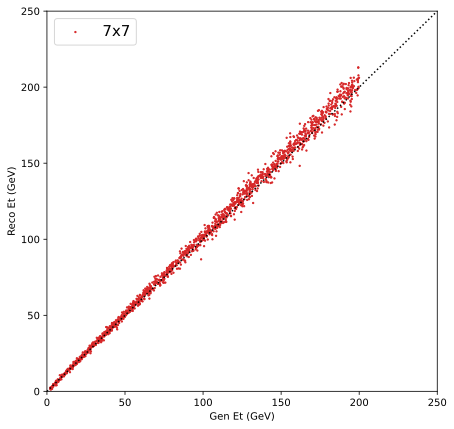

In [22]:
fig = plt.figure(figsize=(7,7))
x = df_photon200_5binsfromEdge_1['GenEnergy_1']
y7 = df_photon200_5binsfromEdge_1['Tot7x7_1']
plt.scatter(x, y7, s=markersize, label='7x7', alpha=alpha, color=p7.get_facecolors())
axes = plt.gca() 
axes.set_xlim([0,250])
axes.set_ylim([0,250])
plt.axline((150,150), (550,550), linestyle=":", color='black')
plt.xlabel('Gen Et (GeV)')
plt.ylabel('Reco Et (GeV)')
plt.legend(loc='upper left', fontsize=15)